<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-fco-parga/blob/main/Actividades/Actividad_Semanal_7_Notebook-1_Regresion_A01794380.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia y analítica de datos**
## Profesor: **María de la Paz Rico Fernandez**
## **Actividad Semanal -- 7 Regresiones y K means**
___

# Alumno: **Francissco Javier Parga García**
## Matricula: **A01794380**
___

# Notebook 1. Regresión

# 1. Regresión

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import Markdown as md

# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
#Datos para ejercicio:

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [ ]:
modelos = {}

## 1.1 Divide los datos del costo de manufactura. 

Utiliza la función train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 1.2 Regresión Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

modelos['lnr'] = linear_reg

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([-6.00034747]), 66.97622861902316)

### Ecuacion Modelo lineal ajustado:

$\hat{y} = -6.0047X + 66.774$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


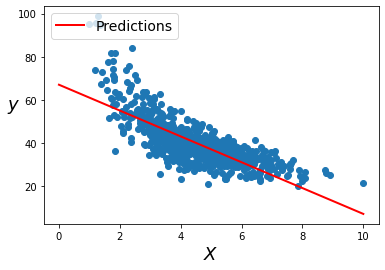

In [ ]:
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

## Errores regresion lineal

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
yhat_train = linear_reg.predict(X_train)
yhat_test = linear_reg.predict(X_test)

In [ ]:
  print(f"""
          Test    Train
  MSE:    {round(mean_squared_error(y_test, yhat_test),2) :<5}   {round(mean_squared_error(y_train, yhat_train),2)}
  MAE:    {round(mean_absolute_error(y_test, yhat_test),2) :<5}   {round(mean_absolute_error(y_train, yhat_train),2)}
  R2:     {round(r2_score(y_test, yhat_test),2) :<5}   {round(r2_score(y_train, yhat_train),2)}
  """)


        Test    Train
MSE:    45.8    47.58
MAE:    4.64    4.99
R2:     0.57    0.58



## 1.3 Regresión Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
lin_reg_poli = LinearRegression(fit_intercept=True)
lin_reg_poli.fit(X_poly, y_train)

modelos['lnr-pol'] = lin_reg_poli

In [ ]:
lin_reg_poli.coef_, lin_reg_poli.intercept_

(array([-4.99673406e+01,  1.07191231e+01, -1.08666514e+00,  4.11133337e-02]),
 127.76148917886916)

### Ecuacion Modelo polimonial ajustado:

$\hat{y} =  -54.53X + 12.67X^2 + -1.41X^3 + -0.06X^4+ 130.91$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


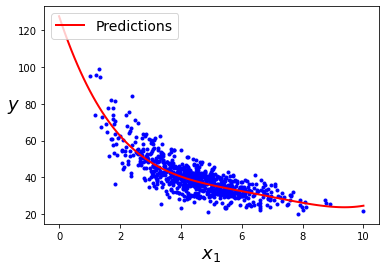

In [ ]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poli.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [ ]:
X_poly_test = poly_features.fit_transform(X_test)

yhat_train = lin_reg_poli.predict(X_poly)
yhat_test = lin_reg_poli.predict(X_poly_test)

In [ ]:
  print(f"""
  Regresion Polinimial
          Test    Train
  MSE:    {round(mean_squared_error(y_test, yhat_test),2) :<5}   {round(mean_squared_error(y_train, yhat_train),2)}
  MAE:    {round(mean_absolute_error(y_test, yhat_test),2) :<5}   {round(mean_absolute_error(y_train, yhat_train),2)}
  R2:     {round(r2_score(y_test, yhat_test),2) :<5}   {round(r2_score(y_train, yhat_train),2)}
  """)


Regresion Polinimial
        Test    Train
MSE:    33.11   34.78
MAE:    4.31    4.48
R2:     0.69    0.69



## 1.4 Realiza la regresión con Ridge y Lasso. 
Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

### Ridge

In [ ]:
RigeModel=Ridge(alpha=2)
RigeModel.fit(X_poly, y_train)

modelos['ridge'] = RigeModel

In [ ]:
RigeModel.coef_, RigeModel.intercept_

(array([-16.79854765,  -0.10821274,   0.3541629 ,  -0.02563225]),
 93.49096508224179)

#### Ecuacion Modelo Ridge ajustado:

$\hat{y} =  -4.48X + -4.59X^2 + 1.04X^3 + -0.06X^4+ 81.39$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


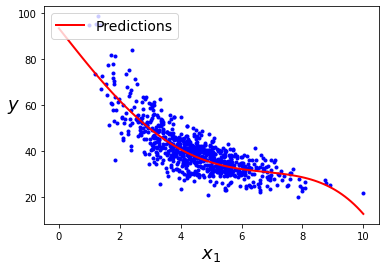

In [ ]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = RigeModel.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

#### Metricas Ridge

In [ ]:
X_poly_test = poly_features.fit_transform(X_test)

yhat_train = RigeModel.predict(X_poly)
yhat_test = RigeModel.predict(X_poly_test)

In [ ]:
  print(f"""
  Regresion Ridge
          Test    Train
  MSE:    {round(mean_squared_error(y_test, yhat_test),2) :<5}   {round(mean_squared_error(y_train, yhat_train),2)}
  MAE:    {round(mean_absolute_error(y_test, yhat_test),2) :<5}   {round(mean_absolute_error(y_train, yhat_train),2)}
  R2:     {round(r2_score(y_test, yhat_test),2) :<5}   {round(r2_score(y_train, yhat_train),2)}
  """)


Regresion Ridge
        Test    Train
MSE:    36.14   36.17
MAE:    4.32    4.53
R2:     0.66    0.68



### Lasso

In [ ]:
LassoModel=Lasso(alpha=0.95, max_iter=50000)
LassoModel.fit(X_poly, y_train)

modelos['lasso'] = LassoModel

In [ ]:
LassoModel.coef_, LassoModel.intercept_

(array([-0.        , -3.23152312,  0.50082083, -0.02164685]),
 67.18342602784045)

#### Ecuacion Modelo Lasso ajustado:

$\hat{y} =  -2.14X^2 + 0.21X^3 + 63.36$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


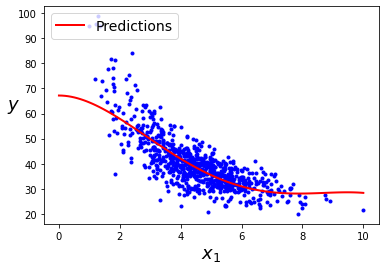

In [ ]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = LassoModel.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

#### Metricas Lasso

In [ ]:
X_poly_test = poly_features.fit_transform(X_test)

yhat_train = LassoModel.predict(X_poly)
yhat_test = LassoModel.predict(X_poly_test)

In [ ]:
  print(f"""
  Regresion Lasso
          Test    Train
  MSE:    {round(mean_squared_error(y_test, yhat_test),2) :<5}   {round(mean_squared_error(y_train, yhat_train),2)}
  MAE:    {round(mean_absolute_error(y_test, yhat_test),2) :<5}   {round(mean_absolute_error(y_train, yhat_train),2)}
  R2:     {round(r2_score(y_test, yhat_test),2) :<5}   {round(r2_score(y_train, yhat_train),2)}
  """)


Regresion Lasso
        Test    Train
MSE:    41.17   40.77
MAE:    4.32    4.64
R2:     0.62    0.64



In [ ]:
modelos

{'lnr': LinearRegression(),
 'lnr-pol': LinearRegression(),
 'ridge': Ridge(alpha=2),
 'lasso': Lasso(alpha=0.95, max_iter=50000)}

In [ ]:
metricas = {}
metricas_fn = {'mse':mean_squared_error,
               'mae':mean_absolute_error,
               'r2': r2_score}

for nombre, modelo in modelos.items():
  if nombre == 'lnr':

    yhat_train = modelo.predict(X_train)
    yhat_test = modelo.predict(X_test)

    for error, fn in metricas_fn.items():
      metricas[nombre+'_'+error] = [fn(y_test, yhat_test), fn(y_train, yhat_train)]

  else:
    X_poly_test = poly_features.fit_transform(X_test)

    yhat_train = modelo.predict(X_poly)
    yhat_test = modelo.predict(X_poly_test)

    for error, fn in metricas_fn.items():
      metricas[nombre+'_'+error] = [fn(y_test, yhat_test), fn(y_train, yhat_train)]



In [ ]:
pd.DataFrame(metricas).T.rename(columns={0:'Test', 1:'Train'})

,Test,Train
lnr_mse,45.796412,47.583783
lnr_mae,4.642591,4.990163
lnr_r2,0.572518,0.580392
lnr-pol_mse,33.112695,34.780434
lnr-pol_mae,4.311094,4.476395
lnr-pol_r2,0.690913,0.693295
ridge_mse,36.142377,36.169194
ridge_mae,4.318356,4.531951
ridge_r2,0.662633,0.681049
lasso_mse,41.165321,40.769222


In [ ]:
import re

--mse--


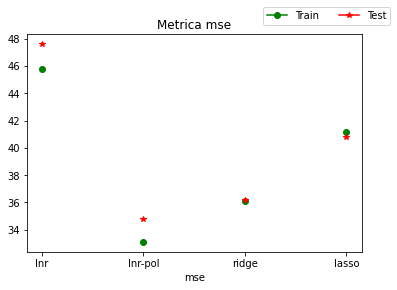

////////////

--mae--


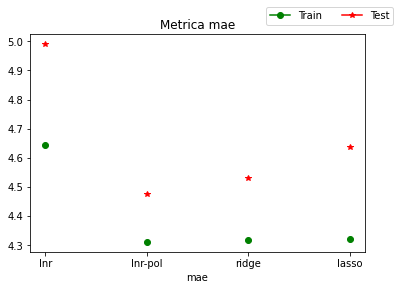

////////////

--r2--


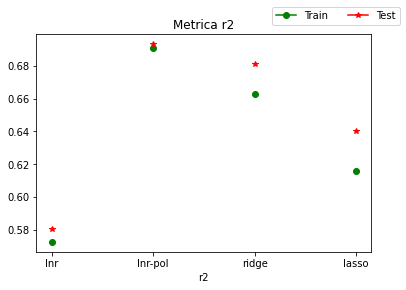

////////////



In [ ]:
nombres_metricas = ['mse', 'mae', 'r2']

for nombre in nombres_metricas:

  for metrica, value in metricas.items():

    if nombre in metrica:
      plt.plot(re.sub('_.*', '', metrica), value[0], '-o', label='Train', color='g')
      plt.plot(re.sub('_.*', '', metrica), value[1], '-*', label='Test', color='r')

  print('--'+nombre+'--')
  plt.xlabel(nombre)
  plt.legend( ["Train", "Test"], bbox_to_anchor= (1.1, 1.15), ncol=2)
  plt.title('Metrica '+nombre)
  plt.show()
  print ("////////////\n")

## 1.5 Conclusiones regresion lineal


>Para este problema, la regresión lineal básica, solo logra una eficiencia de `R2` del `57%` para **evaluación** y `58%` de **entrenamiento**, mientras que la regresión **polinomial** alcanza un R2 de `69%` de **evaluación** y un `69.3%` de **entrenamiento** usando un polinomio de `4to` grado.


>Para este caso específico, un modelo de regresión no es el más óptimo, dado que aun se puede mejorar las predicciones con un modelo con algún tipo de transformación no lineal que ayude reducir la varianza en los datos de entrada y por lo  tanto, ayude a mejorar las predicciones.


# 2. Regresión múltiple

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

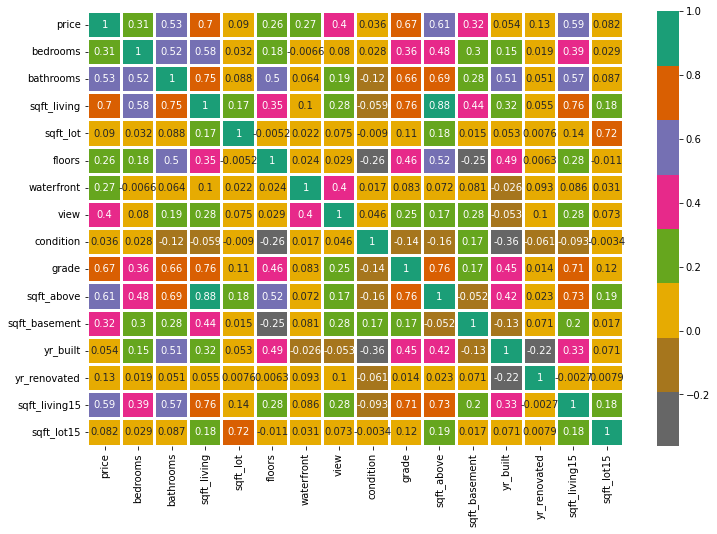

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
modelos = {}

## 2.1 Divide los datos. 

Utiliza la función train_test_split 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


## 2.2 Regresión Múltiple Lineal.

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

modelos['lnr'] = linear_reg

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

### Ecuacion Modelo lineal ajustado:

$\hat{y} = -3.82008048e+04X_1 + 4.14661380e+04X_2 + 1.07992584e+02X_3 + 1.71356997e-02X_4 + 3.16916913e+04X_5 + 5.52691023e+05,X_6 +  4.12493228e+04X_7 + 2.12221443e+04X_8 + 1.19493216e+05X_9 + 4.77750271e+01X_{10} + 6.02175565e+01X_{11} -3.55090216e+03X_{12} + 1.32602215e+01X_{13} + 2.90059284e+01X_{14} -5.48132603e-014X_{15} + 6151359.2627409$

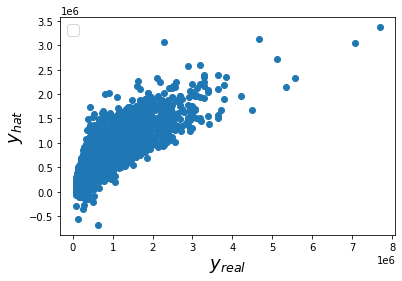

In [ ]:
y_hat= linear_reg.predict(X_train)

plt.scatter(y_train, y_hat)
#plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$y_{real}$", fontsize=18)
plt.ylabel("$y_{hat}$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

## Errores regresion lineal

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
yhat_train = linear_reg.predict(X_train)
yhat_test = linear_reg.predict(X_test)

In [ ]:
  print(f"""
          Test        Train
  MSE:    {"{:.3e}".format(mean_squared_error(y_test, yhat_test)) :<5}   {"{:.3e}".format(mean_squared_error(y_train, yhat_train))}
  MAE:    {"{:.3e}".format(mean_absolute_error(y_test, yhat_test)) :<5}   {"{:.3e}".format(mean_absolute_error(y_train, yhat_train))}
  R2:     {"{:.3e}".format(r2_score(y_test, yhat_test)) :<5}   {"{:.3e}".format(r2_score(y_train, yhat_train))}
  """)


        Test        Train
MSE:    5.389e+10   4.590e+10
MAE:    1.375e+05   1.393e+05
R2:     6.580e-01   6.529e-01



## 2.3 Regresión Múltiple Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
lin_reg_poli = LinearRegression(fit_intercept=True)
lin_reg_poli.fit(X_poly, y_train)

modelos['lnr-pol'] = lin_reg_poli

In [ ]:
lin_reg_poli.coef_, lin_reg_poli.intercept_

(array([[ 3.17395792e+02, -2.70130239e+02,  1.30610945e+01,
         -1.40757708e+01,  2.62496809e+00,  3.24633595e+00,
         -8.08938960e-01,  3.60826046e-01, -6.17577143e-01,
          1.54124566e-01,  9.07922470e-01, -2.42302232e-01,
          1.57944629e-01, -4.12303248e-01, -1.89494993e+01,
          2.57497810e-01,  3.31180922e-01,  2.56156276e+01,
         -9.51793255e-02, -6.36531339e-01,  6.24165339e-01,
         -6.14143248e-02,  9.57006257e-01,  1.21507890e+00,
          1.85183285e+01,  7.24785462e+00,  3.94289500e+02,
          4.24069045e+00,  5.07845227e+00, -1.89095034e+01,
         -4.03258004e-01, -2.08156624e+02, -6.15751437e+01,
         -4.82898236e-01, -6.40532068e-02, -8.73845428e-02,
         -1.73829295e-01, -5.97615346e-01, -1.69018199e+02,
         -3.91260224e+01, -1.76779529e+02, -4.47565136e+00,
         -1.70541213e+02,  1.09037853e+02, -3.48181375e-01,
          5.54961266e-03, -3.10542727e+02, -2.04577118e+01,
         -5.10909707e+01,  1.44081886e+0

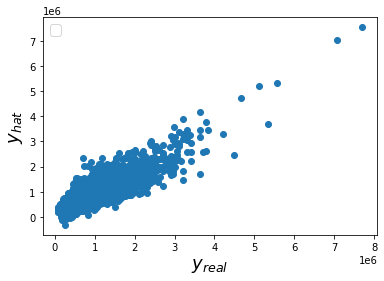

In [ ]:
y_hat= lin_reg_poli.predict(X_poly)

plt.scatter(y_train, y_hat)
#plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$y_{real}$", fontsize=18)
plt.ylabel("$y_{hat}$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
X_poly_test = poly_features.fit_transform(X_test)

yhat_train = lin_reg_poli.predict(X_poly)
yhat_test = lin_reg_poli.predict(X_poly_test)

In [ ]:
  print(f"""
          Test        Train
  MSE:    {"{:.3e}".format(mean_squared_error(y_test, yhat_test)) :<5}   {"{:.3e}".format(mean_squared_error(y_train, yhat_train))}
  MAE:    {"{:.3e}".format(mean_absolute_error(y_test, yhat_test)) :<5}   {"{:.3e}".format(mean_absolute_error(y_train, yhat_train))}
  R2:     {"{:.3e}".format(r2_score(y_test, yhat_test)) :<5}   {"{:.3e}".format(r2_score(y_train, yhat_train))}
  """)


        Test        Train
MSE:    4.510e+10   3.033e+10
MAE:    1.276e+05   1.201e+05
R2:     7.137e-01   7.706e-01



## 2.4 Realiza la regresión con Ridge y Lasso. 
Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

### Ridge

In [ ]:
RigeModel=Ridge(alpha=2)
RigeModel.fit(X_poly, y_train)

modelos['ridge'] = RigeModel

In [ ]:
RigeModel.coef_, RigeModel.intercept_

(array([[ 7.69359822e+03, -3.57106267e+02,  2.85677539e+02,
          1.93962862e+03, -4.62663942e+02, -1.28817731e+03,
          1.08987556e+03, -5.40288433e+02,  8.68735382e+02,
          7.18421902e+02,  8.78854181e+02,  6.13676900e+02,
         -6.69286340e+02, -1.51824889e+03, -1.72761614e+03,
          1.98565914e+03,  1.69427626e+01,  6.23837975e+02,
         -1.04956851e+01, -2.09696143e+03,  5.27893137e+02,
         -1.49922527e+03,  1.00171454e+03, -1.83631616e+02,
          9.17303806e+02,  7.22619014e+02,  8.89089607e+02,
         -1.76808212e+03, -2.50485262e+03,  9.67979293e+00,
          1.19624107e+03, -3.07589003e+03, -2.95208928e+01,
          1.06593323e+03, -4.70936557e+02,  2.07894164e+02,
         -1.34559533e+02, -1.68994344e+03, -6.98393260e+02,
         -1.10661214e+03, -4.36311190e+03, -1.17762577e+03,
          8.25785019e+03,  3.01969380e+01, -1.95570500e+02,
         -6.10576465e+01,  2.35575202e+03, -1.38071961e+03,
          1.68276134e+01,  3.96996919e+0

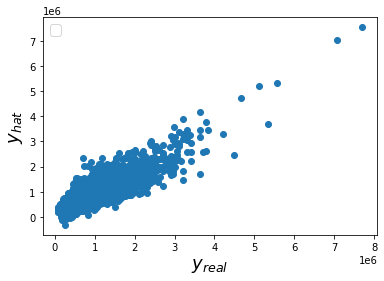

In [ ]:
y_hat= lin_reg_poli.predict(X_poly)

plt.scatter(y_train, y_hat)
#plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$y_{real}$", fontsize=18)
plt.ylabel("$y_{hat}$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

#### Metricas Ridge

In [ ]:
X_poly_test = poly_features.fit_transform(X_test)

yhat_train = RigeModel.predict(X_poly)
yhat_test = RigeModel.predict(X_poly_test)

In [ ]:
  print(f"""
          Test        Train
  MSE:    {"{:.3e}".format(mean_squared_error(y_test, yhat_test)) :<5}   {"{:.3e}".format(mean_squared_error(y_train, yhat_train))}
  MAE:    {"{:.3e}".format(mean_absolute_error(y_test, yhat_test)) :<5}   {"{:.3e}".format(mean_absolute_error(y_train, yhat_train))}
  R2:     {"{:.3e}".format(r2_score(y_test, yhat_test)) :<5}   {"{:.3e}".format(r2_score(y_train, yhat_train))}
  """)


        Test        Train
MSE:    1.807e+11   1.017e+11
MAE:    2.127e+05   1.969e+05
R2:     -1.472e-01   2.306e-01



### Lasso

In [ ]:
LassoModel=Lasso(alpha=0.95, max_iter=50000)
LassoModel.fit(X_poly, y_train)

modelos['lasso'] = LassoModel

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.750e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
LassoModel.coef_, LassoModel.intercept_

(array([ 5.80164540e+05, -7.81922665e+05,  1.16159273e+02, -2.34249894e+01,
        -1.30651460e+06,  0.00000000e+00, -3.25032312e+04,  2.69602205e+05,
         7.95587536e+05, -9.68761788e+01, -9.89733667e+02, -3.48157129e+04,
        -1.62636275e+03,  2.13322940e+03, -3.50932785e+01, -1.11195582e+04,
        -1.25717111e+04, -1.11034108e+02,  2.76561721e+00,  6.39527706e+04,
        -7.70337563e+05, -5.22980137e+04,  1.32013675e+05, -2.95679184e+04,
        -4.89977252e+01, -6.76425115e+00, -5.32056332e+01,  4.35836449e+01,
         5.15352507e+01,  6.16110885e-01, -8.62358247e+03, -5.85200333e+01,
         1.77500477e+00,  2.22438554e+04, -1.28893563e+05, -2.57208226e+04,
         1.32696816e+05, -1.01054526e+04, -7.99309279e+01,  9.56507995e-01,
         3.22993523e+02, -9.38266423e+01,  1.18197786e+02, -1.33188218e+00,
        -7.46930041e-02,  2.93012719e-03, -1.29768254e+01, -2.28605242e+01,
         4.46178903e+01, -2.74889308e+00, -1.49002156e+00, -5.99853856e-02,
         2.2

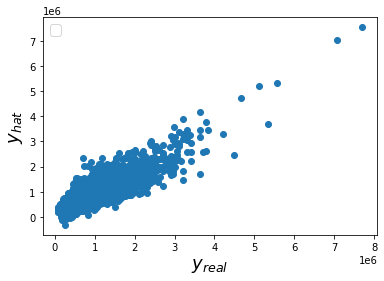

In [ ]:
y_hat= lin_reg_poli.predict(X_poly)

plt.scatter(y_train, y_hat)
#plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$y_{real}$", fontsize=18)
plt.ylabel("$y_{hat}$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

#### Metricas Lasso

In [ ]:
X_poly_test = poly_features.fit_transform(X_test)

yhat_train = LassoModel.predict(X_poly)
yhat_test = LassoModel.predict(X_poly_test)

In [ ]:
  print(f"""
          Test        Train
  MSE:    {"{:.3e}".format(mean_squared_error(y_test, yhat_test)) :<5}   {"{:.3e}".format(mean_squared_error(y_train, yhat_train))}
  MAE:    {"{:.3e}".format(mean_absolute_error(y_test, yhat_test)) :<5}   {"{:.3e}".format(mean_absolute_error(y_train, yhat_train))}
  R2:     {"{:.3e}".format(r2_score(y_test, yhat_test)) :<5}   {"{:.3e}".format(r2_score(y_train, yhat_train))}
  """)


        Test        Train
MSE:    3.719e+10   2.825e+10
MAE:    1.220e+05   1.165e+05
R2:     7.640e-01   7.864e-01



In [ ]:
modelos

{'lnr': LinearRegression(),
 'lnr-pol': LinearRegression(),
 'ridge': Ridge(alpha=2),
 'lasso': Lasso(alpha=0.95, max_iter=50000)}

In [ ]:
metricas = {}
metricas_fn = {'mse':mean_squared_error,
               'mae':mean_absolute_error,
               'r2': r2_score}

for nombre, modelo in modelos.items():
  if nombre == 'lnr':

    yhat_train = modelo.predict(X_train)
    yhat_test = modelo.predict(X_test)

    for error, fn in metricas_fn.items():
      metricas[nombre+'_'+error] = [fn(y_test, yhat_test), fn(y_train, yhat_train)]

  else:
    X_poly_test = poly_features.fit_transform(X_test)

    yhat_train = modelo.predict(X_poly)
    yhat_test = modelo.predict(X_poly_test)

    for error, fn in metricas_fn.items():
      metricas[nombre+'_'+error] = [fn(y_test, yhat_test), fn(y_train, yhat_train)]



In [ ]:
pd.DataFrame(metricas).T.rename(columns={0:'Test', 1:'Train'})

,Test,Train
lnr_mse,5.388590e+10,4.589658e+10
lnr_mae,1.374801e+05,1.392693e+05
lnr_r2,6.579723e-01,6.529197e-01
lnr-pol_mse,4.510378e+10,3.033310e+10
lnr-pol_mae,1.276409e+05,1.201112e+05
lnr-pol_r2,7.137147e-01,7.706142e-01
ridge_mse,1.807324e+11,1.017481e+11
ridge_mae,2.126967e+05,1.968785e+05
ridge_r2,-1.471549e-01,2.305579e-01
lasso_mse,3.718668e+10,2.824904e+10


In [ ]:
import re

--mse--


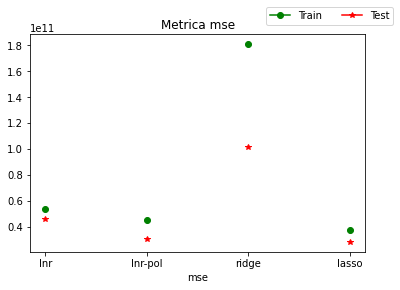

////////////

--mae--


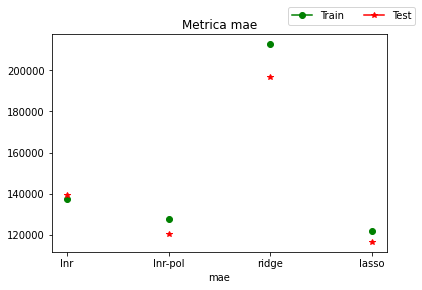

////////////

--r2--


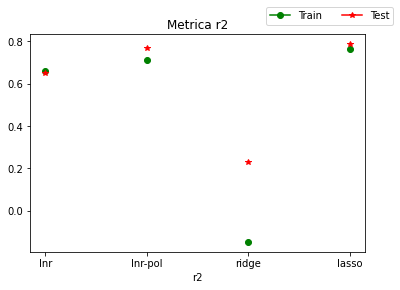

////////////



In [ ]:
nombres_metricas = ['mse', 'mae', 'r2']

for nombre in nombres_metricas:

  for metrica, value in metricas.items():

    if nombre in metrica:
      plt.plot(re.sub('_.*', '', metrica), value[0], '-o', label='Train', color='g')
      plt.plot(re.sub('_.*', '', metrica), value[1], '-*', label='Test', color='r')

  print('--'+nombre+'--')
  plt.xlabel(nombre)
  plt.legend( ["Train", "Test"], bbox_to_anchor= (1.1, 1.15), ncol=2)
  plt.title('Metrica '+nombre)
  plt.show()
  print ("////////////\n")

## Conclusiones regresion lineal multiple

>Para el escenario de las casas, la regresión lineal múltiple, logra una eficiencia de `R2` del `65.8%` para evaluación y `65.3%` de entrenamiento, mientras que la regresión Lasso alcanza un `R2` de `76.4%` de evaluación y un `78.6%` de entrenamiento usando un polinomio de `3er` grado, con un Alpha de `0.95`.

>Para este caso específico, un modelo de regresión tiene buen desempeño, sin embargo, se puede mejorar implementando un pipeline para transformación de datos, dado que varias de las variables muestran sesgo y se podría mejorar el ajuste del modelo para incrementar su eficiencia.
